####  Name: Varshini Thatiparthi
#### Mail: varshini.thatiparthi@gmail.com

In [146]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib import rcParams
from scipy import stats
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [116]:
df = pd.read_csv('screening_exercise_orders_v201810.csv')

In [117]:
df

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:20,794.44,0
13467,9811,1,2017-12-31 22:24:06,148.60,0
13468,9812,0,2017-12-31 23:01:10,153.00,1
13469,9813,0,2017-12-31 23:11:02,534.00,1


A) Assemble a dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)

Sort the dataframe by customer_id ascending and display the first 10 rows.

In [118]:

# computing most_recent_order_date
mostrecent_order = df.groupby(['customer_id','gender'],sort=False)['date'].max()
mostrecent_order


customer_id  gender
1000         0         2017-01-01 00:11:31
1001         0         2017-01-01 00:29:56
1002         1         2017-02-19 21:35:31
1003         1         2017-04-26 02:37:20
1004         0         2017-01-01 03:11:54
                              ...         
9809         1         2017-12-31 21:39:33
9810         1         2017-12-31 22:16:20
9811         1         2017-12-31 22:24:06
9812         0         2017-12-31 23:01:10
9813         0         2017-12-31 23:11:02
Name: date, Length: 8814, dtype: object

In [119]:
#number of orders placed by the customers
order_count = df['customer_id'].value_counts()


In [120]:
#converting into dataframe
mostrecent_order_df = mostrecent_order.to_frame().reset_index()
order_count_df = order_count.to_frame().reset_index()

In [121]:
#renaming column names
mostrecent_order_df.columns = ['customer_id','gender','most_recent_order_date']
order_count_df.columns = ['customer_id','order_count']

In [122]:
#joining the dataframes with customer_id
dataframe = mostrecent_order_df.set_index('customer_id').join(order_count_df.set_index('customer_id'))

In [123]:
print(dataframe.head(10))

             gender most_recent_order_date  order_count
customer_id                                            
1000              0    2017-01-01 00:11:31            1
1001              0    2017-01-01 00:29:56            1
1002              1    2017-02-19 21:35:31            3
1003              1    2017-04-26 02:37:20            4
1004              0    2017-01-01 03:11:54            1
1005              1    2017-12-16 01:39:27            2
1006              1    2017-05-09 15:27:20            3
1007              0    2017-01-01 15:59:50            1
1008              0    2017-12-17 05:47:48            3
1009              1    2017-01-01 19:27:17            1


B) Plot the count of orders per week for the store.

In [124]:
# %matplotlib inline
# rcParams['figure.figsize'] = 20,10

In [125]:
#converting date to datetime 
df['date'] = pd.to_datetime(df['date'])
#converting date to number of weeks in a year
df['perWeek'] = df.date.dt.strftime('%Y-%U')


In [126]:
#count of orders per week
count_order_perweek = df.groupby(['perWeek'])['value'].count()
count_order_perweek 

perWeek
2017-01    175
2017-02    259
2017-03    356
2017-04    287
2017-05    209
2017-06    198
2017-07    233
2017-08    314
2017-09    271
2017-10    319
2017-11    272
2017-12    237
2017-13    226
2017-14    337
2017-15    305
2017-16    228
2017-17    209
2017-18    251
2017-19    341
2017-20    554
2017-21    392
2017-22    203
2017-23    227
2017-24    311
2017-25    264
2017-26    359
2017-27    319
2017-28    221
2017-29    245
2017-30    192
2017-31    184
2017-32    185
2017-33    186
2017-34    283
2017-35    221
2017-36    210
2017-37    239
2017-38    172
2017-39    200
2017-40    284
2017-41    413
2017-42    175
2017-43    150
2017-44    159
2017-45    175
2017-46    183
2017-47    341
2017-48    395
2017-49    226
2017-50    287
2017-51    230
2017-52    224
2017-53     35
Name: value, dtype: int64

In [141]:
count_order_perweek.columns = ['Week_Number', 'Order count']
count_order_perweek

perWeek
2017-01    175
2017-02    259
2017-03    356
2017-04    287
2017-05    209
2017-06    198
2017-07    233
2017-08    314
2017-09    271
2017-10    319
2017-11    272
2017-12    237
2017-13    226
2017-14    337
2017-15    305
2017-16    228
2017-17    209
2017-18    251
2017-19    341
2017-20    554
2017-21    392
2017-22    203
2017-23    227
2017-24    311
2017-25    264
2017-26    359
2017-27    319
2017-28    221
2017-29    245
2017-30    192
2017-31    184
2017-32    185
2017-33    186
2017-34    283
2017-35    221
2017-36    210
2017-37    239
2017-38    172
2017-39    200
2017-40    284
2017-41    413
2017-42    175
2017-43    150
2017-44    159
2017-45    175
2017-46    183
2017-47    341
2017-48    395
2017-49    226
2017-50    287
2017-51    230
2017-52    224
2017-53     35
Name: value, dtype: int64

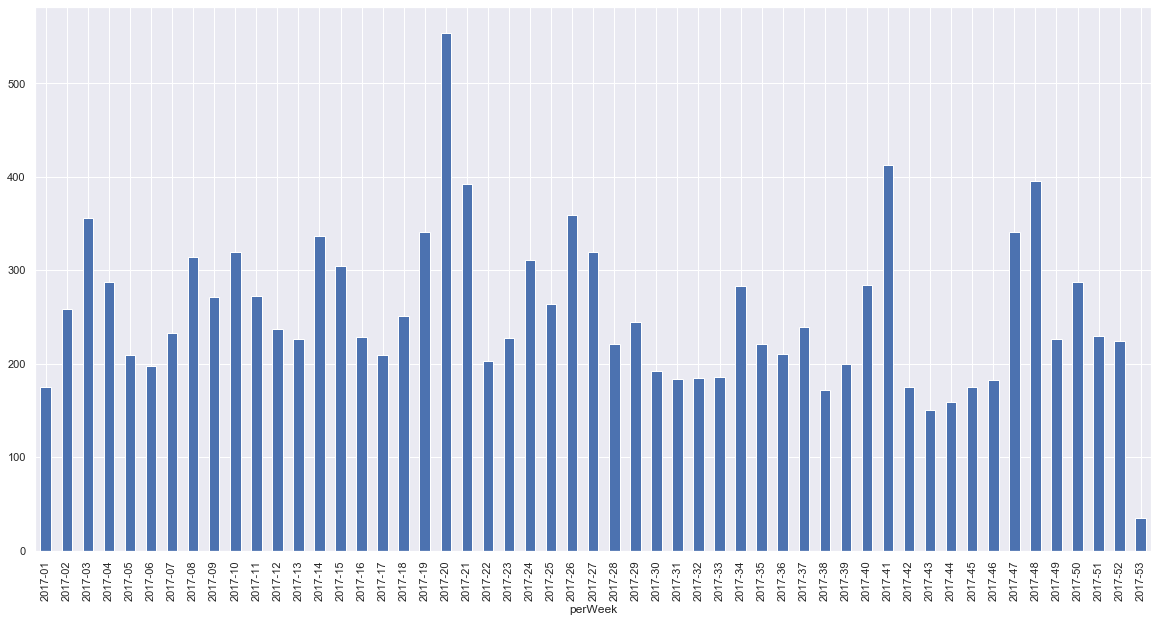

In [143]:
plt = count_order_perweek.plot.bar()

C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

In [129]:
gender_zero = df.groupby('gender')['value'].mean()[0]
print("mean order value for gender 0: ", str(round(gender_zero,2)))

mean order value for gender 0:  363.89


In [130]:
gender_one = df.groupby('gender')['value'].mean()[1]
print("mean order value for gender 1: ", str(round(gender_one,2)))

mean order value for gender 1:  350.71


In [131]:
#calucating the sample size 
sample_size = df['customer_id'].count()/2
#calculating variance for gender 0 and gender 1
gender_zero_variance = df.groupby('gender')['value'].var(ddof=1)[0]
gender_one_variance = df.groupby('gender')['value'].var(ddof=1)[1]
#calculating standard deviation
std_dev = np.sqrt((gender_zero_variance + gender_one_variance)/2)

In [132]:
#t-test
t_test = (gender_zero - gender_one)/(std_dev * np.sqrt(2/sample_size))
print("t: ", str(round(t_test,2)))


t:  1.98


In [133]:
#calucalting degree of freedom
dof = 2 * sample_size - 2
#p-value
p_value = 1-stats.t.cdf(t_test,df=dof)
p = round(2*p_value,2)
print("p value: ", str(p))

p value:  0.05


In [134]:
if(p < 0.05):
    print("p value: ", str(round(2*p,2)),"we can reject null hyposthesis and are significant")
else:
    print("p value: ", str(round(2*p,2)),"Accept the null hypothesis")

p value:  0.1 Accept the null hypothesis


D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [150]:
y = df['gender']
y_pred = df['predicted_gender']
cm = confusion_matrix(y,y_pred)
cm

array([[3349, 3410],
       [1463, 5249]])

(2.0, 0.0)

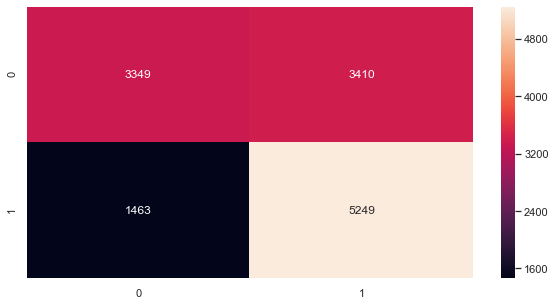

In [164]:
# import seaborn as sns
# sb.set(style="darkgrid")
# plt.figure(figsize=(1))
# ax= plt.subplot()
# sns.heatmap(cm, annot=True, fmt='d', ax = ax)

import seaborn as sns
plt.figure(figsize=(10,5))
ax = sns.heatmap(cm, annot=True, fmt='d') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(2.0, 0.0)

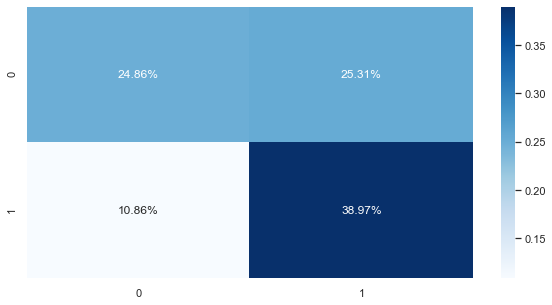

In [166]:
plt.figure(figsize=(10,5))
ax=sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

We have high number of false positives. The predicitons are able to correctly predict the gender with 63.8% accuracy. 

E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

One of my faviourite technique is Random search for hyperparameter optimization. It is implemented in scikit learn. 
This algorithm is very useful in deep learning, where the number of parameters are huge.The basic idea is that not all parameters are equally important to tune in order to get good results (i.e. the optimal solution lies in a low-dimensional submanifold of the search space), so we should see how to focus on that region of interest